# 📍 Recipe: xG per Player in a Single Match

In this example, we'll load event data for a match from StatsBomb's open dataset, filter for shots, and calculate each player's total expected goals (xG).

We'll then visualize the result using matplotlib.

## 🧰 What You'll Learn

- How to access StatsBomb data using `Flow.statsbomb` methods
- How to filter and summarize data with `.filter()` and `.group_by().summary()`
- How to convert the output to a pandas DataFrame for plotting

## Imports

In [1]:
from penaltyblog.matchflow import Flow, where_equals
import matplotlib.pyplot as plt

## Load the Data

In [2]:
# Load events for a StatsBomb match
match_id = 22912  # Champions League Final 2018/2019

flow = Flow.statsbomb.events(match_id)

## Calculate xG by player

In [3]:
xg_summary = (
    flow.filter(where_equals("type.name", "Shot"))
    .group_by("player.name")
    .summary({"total_xg": ("sum", "shot.statsbomb_xg")})
    .sort_by("total_xg", ascending=False)
    .rename(
        **{
            "player.name": "player",
        }
    )
    .collect()
)

for row in xg_summary[:5]:
    print(row)

/Users/martin/repos/penaltyblog/venv/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


{'total_xg': np.float64(0.937532585), 'player': 'Mohamed Salah'}
{'total_xg': np.float64(0.33853526), 'player': 'Bamidele Alli'}
{'total_xg': np.float64(0.20356458), 'player': 'Lucas Rodrigues Moura da Silva'}
{'total_xg': np.float64(0.12390858299999999), 'player': 'Heung-Min Son'}
{'total_xg': np.float64(0.077972755), 'player': 'Divock Okoth Origi'}


## Plot as Bar Chart

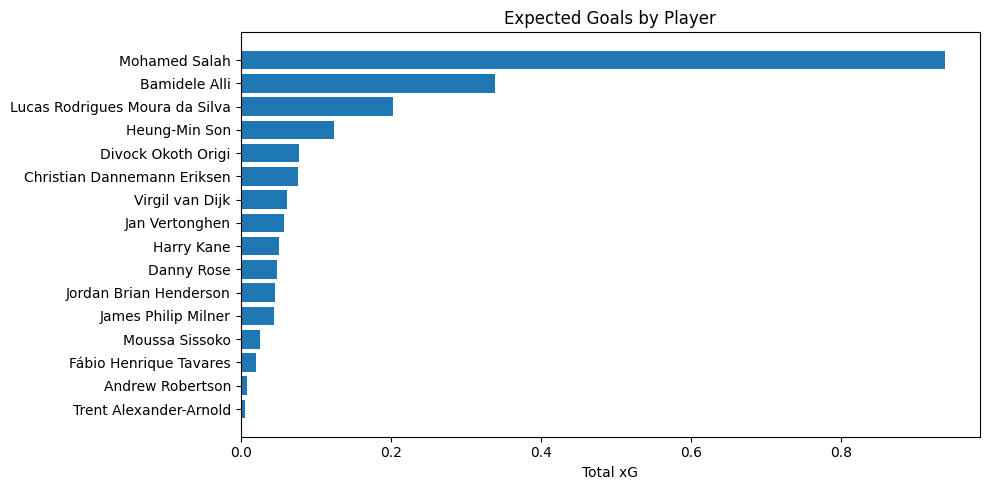

In [4]:
players = [x["player"] for x in xg_summary]
xg = [x["total_xg"] for x in xg_summary]

plt.figure(figsize=(10, 5))
plt.barh(players, xg)
plt.xlabel("Total xG")
plt.title("Expected Goals by Player")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()